# Jose Alexander Ríos Trespalacios

## *Perceptrón multicapa*
Ejercicio:

Implementar el perceptron multicapa para la siguiente base de datos, realizar el proceso de ajuste de hiperparametros, reportar la matriz de confusión para el conjunto de test final y reportar las metricas de rendimiento. Importante realizar un análisis exploratorio de los datos al iniciar.

In [1]:
! git clone https://github.com/ijrios/db_repositorio.git

fatal: destination path 'db_repositorio' already exists and is not an empty directory.


In [2]:
from numpy import unique
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# load the dataset
dataframe = read_csv('/content/db_repositorio/glass.csv')

In [3]:
dataframe

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Análisis exploratorio de datos
A continuación se hace un reporte de la base de datos

In [4]:
values = dataframe.values
X, y = values[:, :-1], values[:, -1]
# gather details
n_rows = X.shape[0]
n_cols = X.shape[1]
classes = unique(y)
n_classes = len(classes)
# summarize
print('N Examples: %d' % n_rows)
print('N Inputs: %d' % n_cols)
print('N Classes: %d' % n_classes)
print('Classes: %s' % classes)
print('Class Breakdown:')
# class breakdown
breakdown = ''
for c in classes:
	total = len(y[y == c])
	ratio = (total / float(len(y))) * 100
	print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

N Examples: 214
N Inputs: 9
N Classes: 6
Classes: [1. 2. 3. 5. 6. 7.]
Class Breakdown:
 - Class 1.0: 70 (32.71028%)
 - Class 2.0: 76 (35.51402%)
 - Class 3.0: 17 (7.94393%)
 - Class 5.0: 13 (6.07477%)
 - Class 6.0: 9 (4.20561%)
 - Class 7.0: 29 (13.55140%)


Como tenemos 6 características, no podemos graficar el espacio de características de 6 dimensiones. Sin embargo, es importante realizar un análisis exploratorio de las características para darnos una idea de su distribución.

Los gráficos tipo pairplot, ayudan a visualizar el espacio de características por pares y en la diagonal, muestra la distribución de cada característica respecto a las clases. Es conveniente utilizar la libreria seaborn para este proceso.

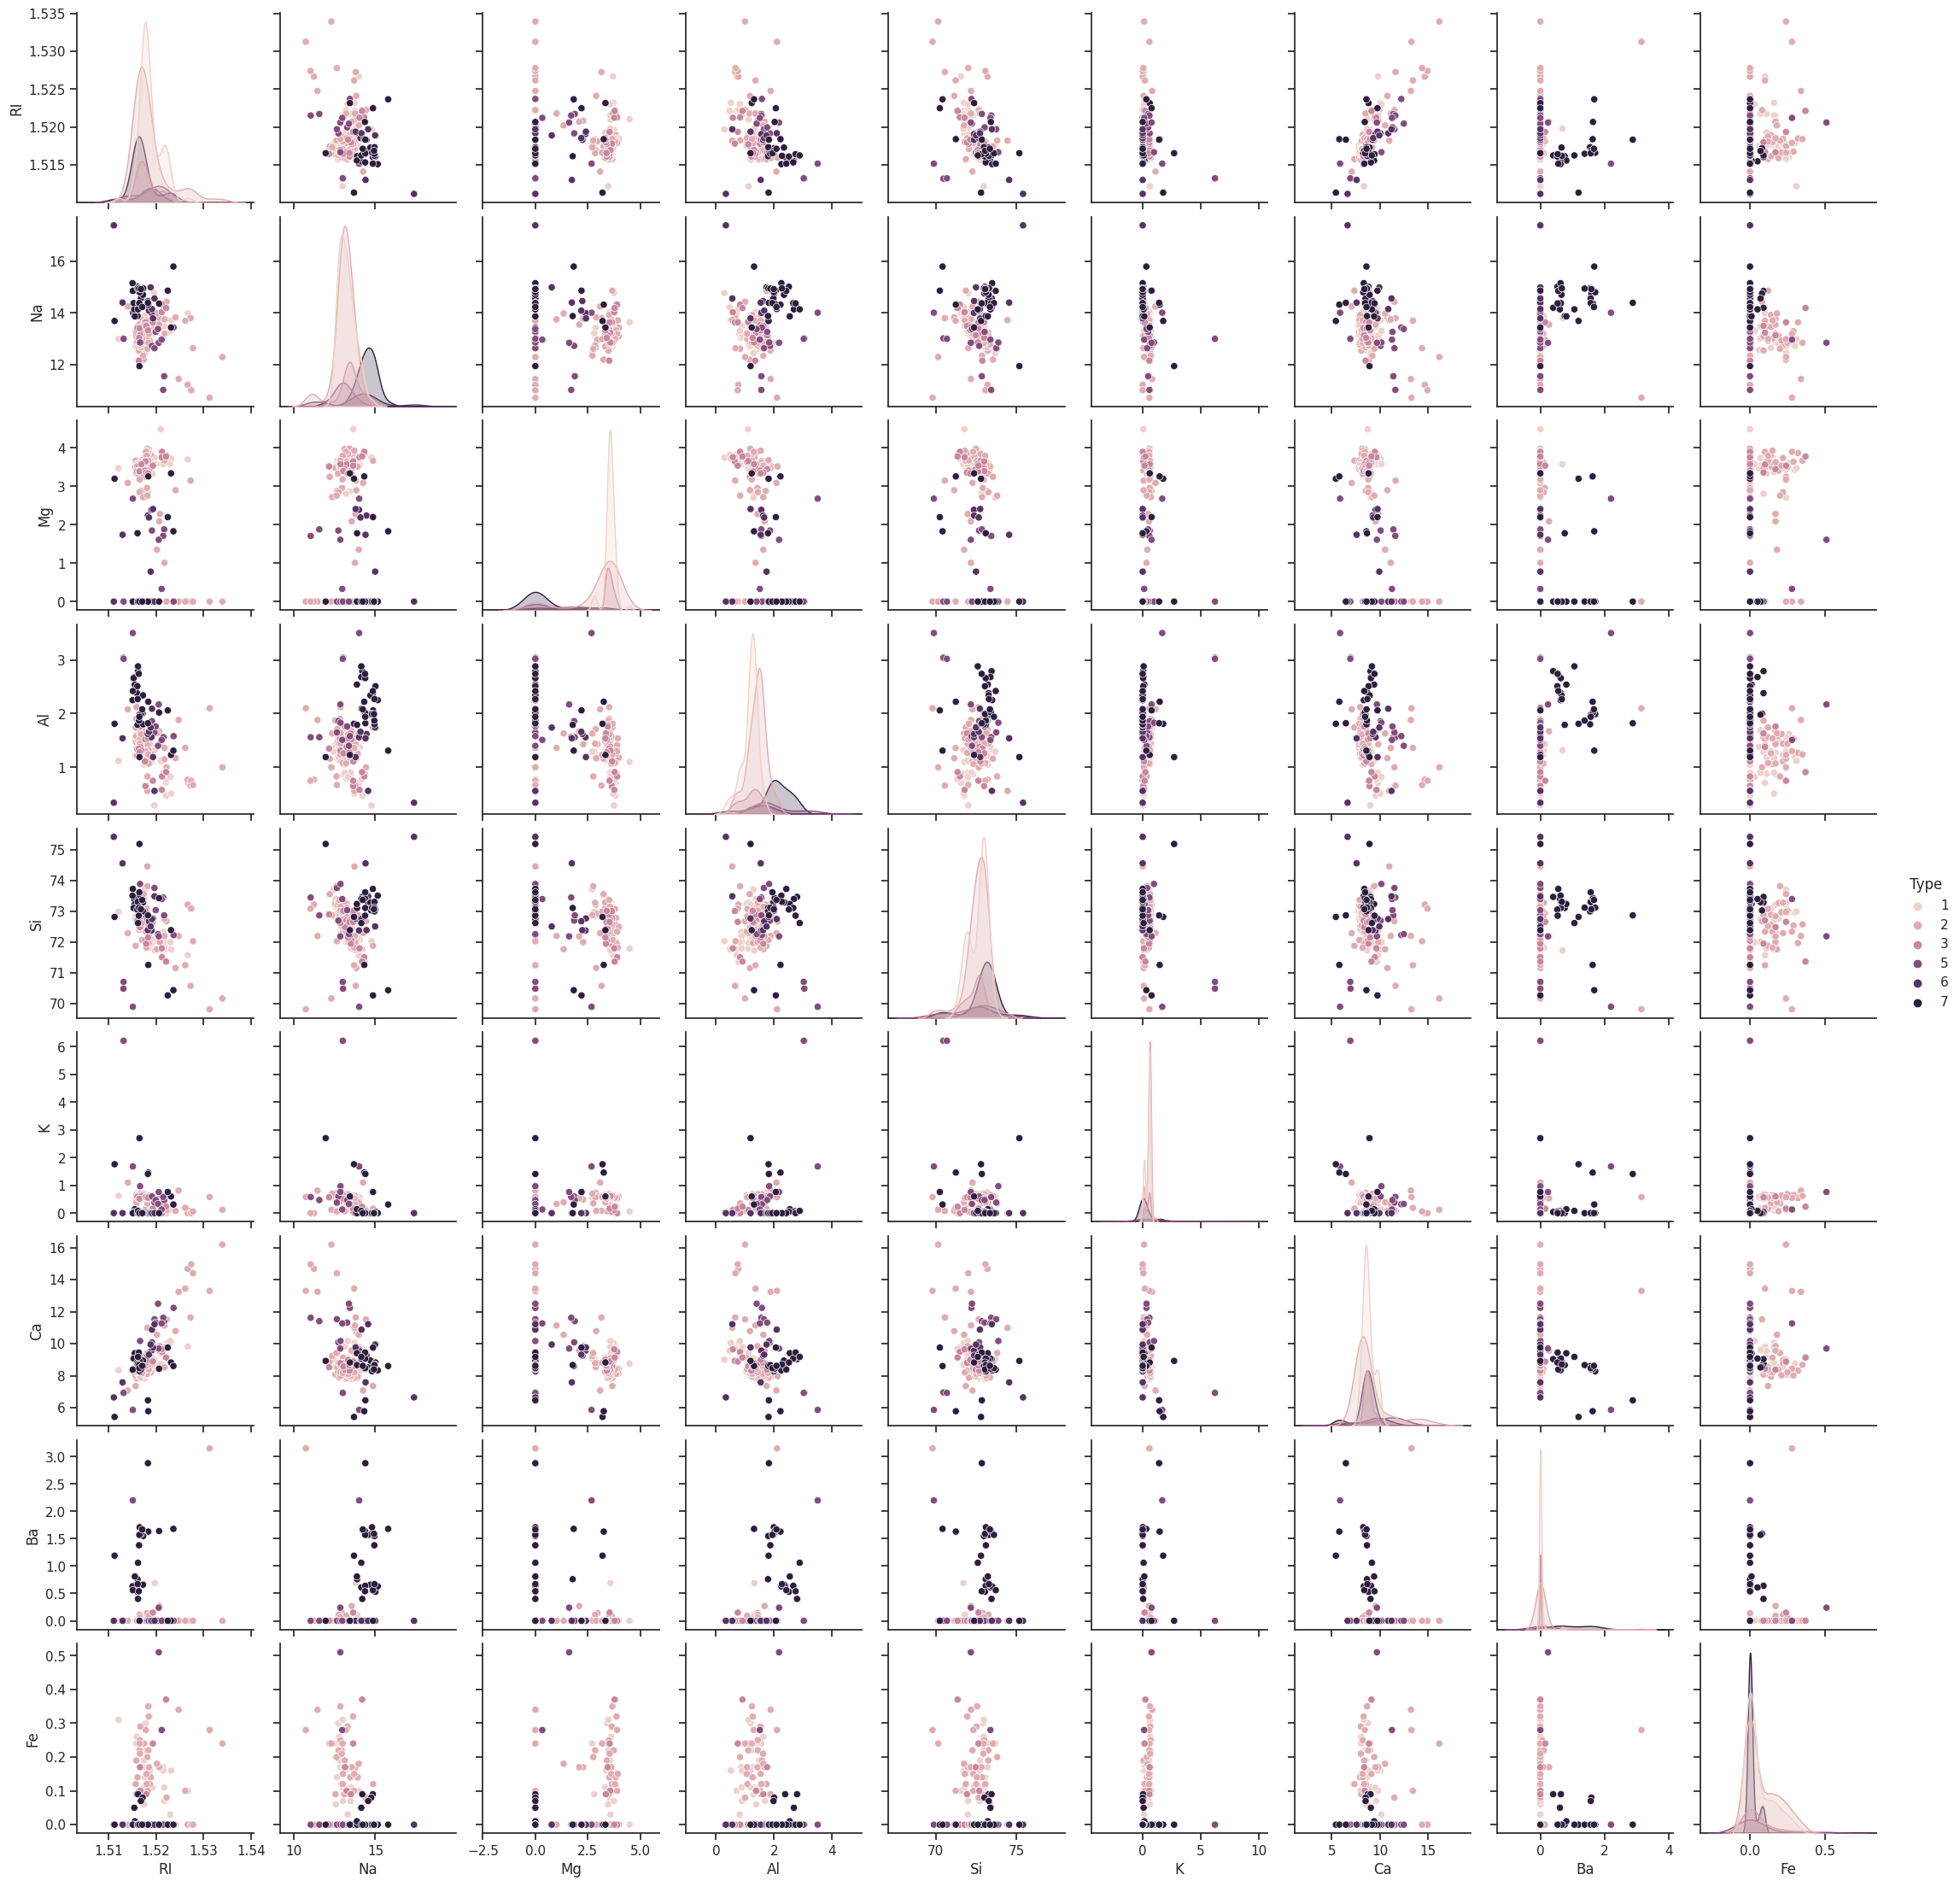

In [5]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(dataframe, hue='Type')

Esta base de datos no tiene etiquetas categóricas, así que no debemos llevarlas a un número, ya que están en numeros

### La base de datos se debe separar en un conjunto de entrenamiento y otro de test:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


Por otro lado, las características se deben escalar, ya que es importante que todas las características sean conmesurables. Los algoritmos de aprendizaje de máquina se pueden ver afectados en su rendimiento, si por ejemplo, tiene una característica en un rango entre 0 y 1 y otra caracteristica entre 0 y 100.


In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)
print(X_train_scaled)

[[0.28665496 0.2887218  0.89672544 ... 0.27884615 0.         0.2745098 ]
 [0.28665496 0.27518797 0.88664987 ... 0.26442308 0.         0.        ]
 [0.19359087 0.47218045 0.         ... 0.34807692 0.25714286 0.01960784]
 ...
 [0.28007024 0.27669173 0.87405542 ... 0.26538462 0.         0.11764706]
 [0.27568042 0.38646617 0.90680101 ... 0.22884615 0.         0.        ]
 [0.285777   0.37293233 0.92947103 ... 0.23365385 0.         0.        ]]


### Vamos a realizar un ejemplo con un **clasificador perceptrón multicapa** basado en la red neuronal artificial preventiva y está formado por varias capas.

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Crear un clasificador de perceptrón multicapa con dos capas ocultas
clf = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000)

# Entrenar el clasificador en los datos de entrenamiento
clf.fit(X_train_scaled, y_train)

# Evaluar el rendimiento del clasificador en los datos de prueba
print("Accuracy:", clf.score(X_test_scaled, y_test))


Accuracy: 0.42592592592592593


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Vamos a realizar otro ejemplo con un **clasificador perceptrón multicapa** basado en la red neuronal artificial y está formado por varias capas, utilizando otras librerías.

In [9]:
from keras.models import Sequential
from keras.layers import Dense

# Definir la arquitectura de la red
modelo = Sequential()
modelo.add(Dense(16, input_dim=9, activation='relu'))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
modelo.fit(X_train_scaled, y_train, epochs=10, batch_size=81)

# Evaluar el modelo
scores = modelo.evaluate(X_test_scaled, y_test)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))


Epoch 1/10
2/2 [==============================] - 1s 18ms/step - loss: 0.1547 - accuracy: 0.3250
Epoch 2/10
2/2 [==============================] - 0s 13ms/step - loss: 0.0995 - accuracy: 0.3250
Epoch 3/10
2/2 [==============================] - 0s 12ms/step - loss: 0.0448 - accuracy: 0.3250
Epoch 4/10
2/2 [==============================] - 0s 13ms/step - loss: -0.0135 - accuracy: 0.3250
Epoch 5/10
2/2 [==============================] - 0s 11ms/step - loss: -0.0744 - accuracy: 0.3250
Epoch 6/10
2/2 [==============================] - 0s 11ms/step - loss: -0.1369 - accuracy: 0.3250
Epoch 7/10
2/2 [==============================] - 0s 12ms/step - loss: -0.1981 - accuracy: 0.3250
Epoch 8/10
2/2 [==============================] - 0s 16ms/step - loss: -0.2600 - accuracy: 0.3250
Epoch 9/10
2/2 [==============================] - 0s 14ms/step - loss: -0.3246 - accuracy: 0.3250
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss: -0.5490 - accuracy: 0.3333

accuracy: 33.33%


#**Ajuste de hiperparametros**

## Red neuronal
En la red neuronal tenemos una mayor cantidad de hiperparametros, ya que las diferentes combinaciones del numero de nueronas y número de capas son conciderados hiperparametros.

Los hiperparametros de las redes neuronales son:

*   El número de capas y de neuronas por capas.
*   La función de activación.
*   El algoritmo de optimización (solver)
*   El termino de regularización (alpha)
*   La tasa de aprendizaje
*   El batch_size
*   El número maximo de iteraciones



Vamos a definir variaciones en el número de neuronas con capas ocultasy variaciones en el número de los alpha.

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
param_grid = {'hidden_layer_sizes':[[5,2], [5,5], 10, 15, 25, 50],
              'alpha':[0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [11]:
grid = GridSearchCV(
        estimator = MLPClassifier(
                        hidden_layer_sizes=(5),
                        solver = 'adam',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_scaled, y_train.flatten())

GridSearchCV(cv=5,
             estimator=MLPClassifier(alpha=0, hidden_layer_sizes=5,
                                     max_iter=5000, random_state=123),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'hidden_layer_sizes': [[5, 2], [5, 5], 10, 15, 25,
                                                50]},
             return_train_score=True, scoring='accuracy')

Podemos visualizar como fue la variación en el rendimiento según el cambio del número de neuronas y validar la diferencia entre el conjunto de validación y de entrenamiento.

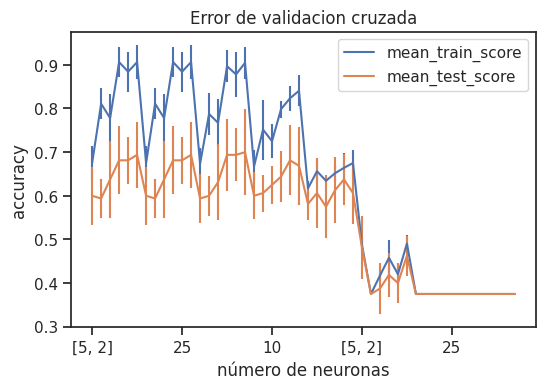

In [12]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada');

In [13]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.700):
{'alpha': 0.01, 'hidden_layer_sizes': 50}


#Medidas de rendimiento

En los ejemplos anteriores, hemos trabajado con la exactitud como medida de rendiemiento.

Recordemos que la exactitud corresponde al número de predicciones acertadas. Sin embargo, en algunos casos, la exactitud no es la medida mas adecuada.

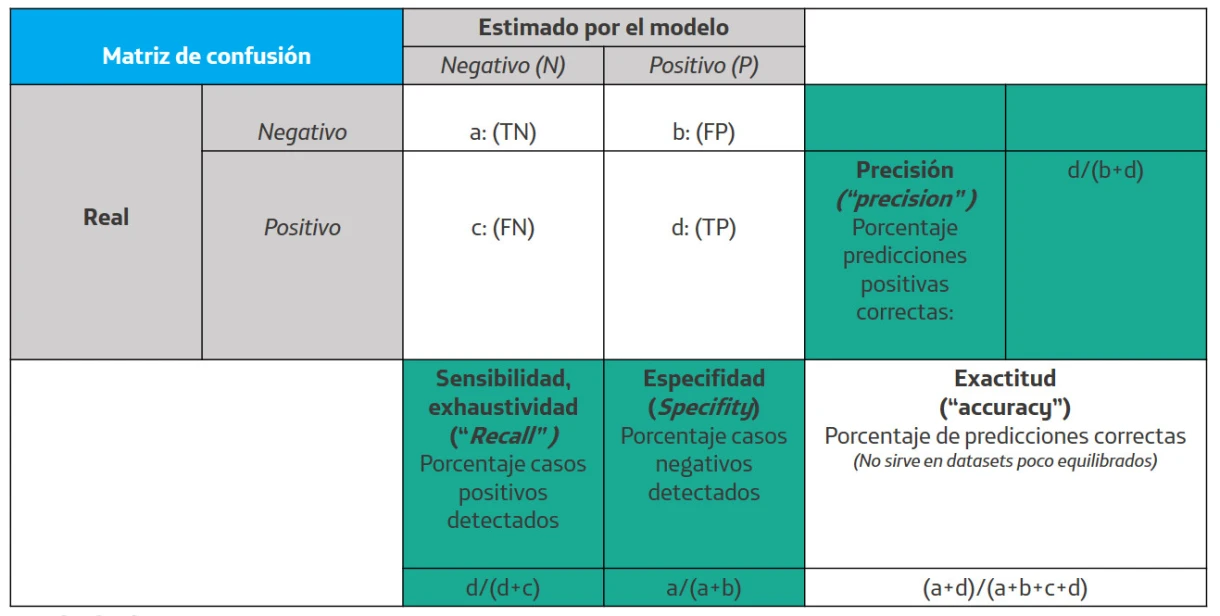

Una medida que resume relativamente bien la relación entre falsos positivo y falsos negativos es el F1 score:

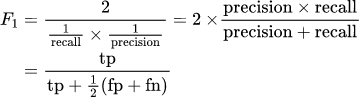

In [14]:
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def results_crossValidation (cv_data):
  results_df = pd.DataFrame(cv_data)
  results_df = results_df.sort_values(by=["rank_test_score"])
  results_df = results_df.set_index(
      results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
  ).rename_axis("kernel")
  return(results_df)

y_pred=grid.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7037037037037037

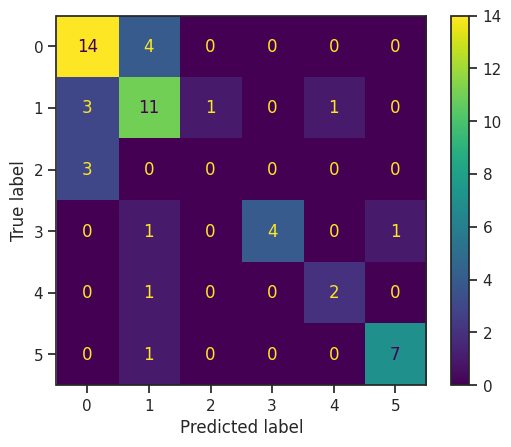

In [17]:
cm = confusion_matrix(y_test, y_pred, labels=[1,2,3,5,6,7])
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.70      0.78      0.74        18
         2.0       0.61      0.69      0.65        16
         3.0       0.00      0.00      0.00         3
         5.0       1.00      0.67      0.80         6
         6.0       0.67      0.67      0.67         3
         7.0       0.88      0.88      0.88         8

    accuracy                           0.70        54
   macro avg       0.64      0.61      0.62        54
weighted avg       0.69      0.70      0.69        54

